In [3]:
import pandas as pd
sleeping_df=pd.read_csv('sleeptime_prediction_dataset.csv')
sleeping_df

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50
...,...,...,...,...,...,...,...
1995,1.97,0.88,3.74,5.64,257.30,0.01,4.24
1996,2.87,0.67,3.01,5.26,269.25,1.75,5.89
1997,0.21,0.79,4.06,6.73,284.01,0.61,3.00
1998,0.17,1.06,2.94,9.45,119.25,1.88,3.53


In [5]:
##데이터 확인, 칼럽 데이터 확인, null값/missing 값 확인
##max, mean, 편향되었는지 등 확인 -> 통계적 값 출력
sleeping_df.describe()
##describe로 찍었을 때 나타나지 않는 통계 정보 출력하려면 어떻게 해야 할까..
## 하고 싶은 액션이 있을 때 구글링 혹은 챗 지피티를 통해 생각 확장,,

## 찾아보는 것도 좋지만 그냥 똑같이 짜보는 것도

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.495915,0.992785,2.985195,6.926945,147.493780,1.010955,4.884375
std,0.876639,0.577303,1.151776,1.723843,84.651139,0.582619,2.028892
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000,0.150000
25%,0.710000,0.500000,1.990000,5.440000,75.980000,0.510000,3.840000
50%,1.520000,0.990000,2.965000,6.910000,146.010000,1.010000,4.600000
75%,2.250000,1.500000,3.960000,8.422500,218.902500,1.530000,5.470000
max,3.000000,2.000000,5.000000,10.000000,299.850000,2.000000,19.810000


In [7]:
sleeping_df_1=sleeping_df.drop(['SleepTime'], axis=1, inplace=False)

data=sleeping_df_1
label=sleeping_df['SleepTime']
print('원 데이터셋의 shape: ',data.shape)
print('레이블 데이터셋의 shape: ',label.shape)
# dataset=
# X_train, X_test, y_train, y_test=train_test_split()

원 데이터셋의 shape:  (2000, 6)
레이블 데이터셋의 shape:  (2000,)


In [9]:
## 마지막줄 먼저 확인 -> 어디서 나왔
##존재하지 않는 키를 이용하려고 할 때 키 에러가 나는구나, 존재하지 않는 데이터가 있구나 
label=sleeping_df['SleepTime']
#print('레이블 데이터셋의 shape: ',label.shape)
label

0       3.45
1       4.88
2       3.61
3       4.94
4       5.50
        ... 
1995    4.24
1996    5.89
1997    3.00
1998    3.53
1999    5.83
Name: SleepTime, Length: 2000, dtype: float64

<Axes: >

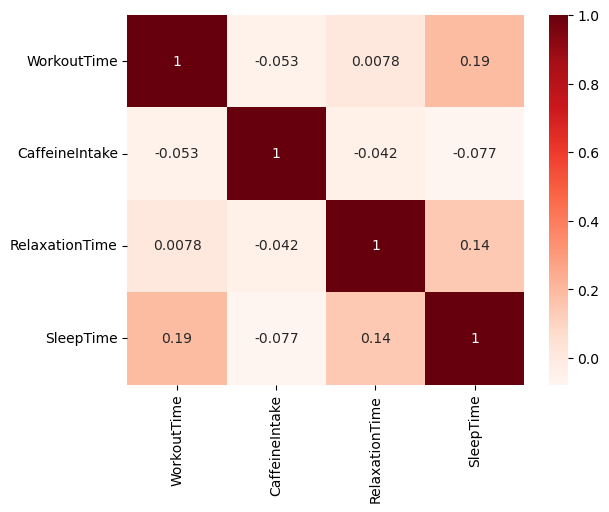

In [61]:
import seaborn as sns

#sns.histplot(x=sleeping_df['RelaxationTime'], y=sleeping_df['SleepTime'])
##Hist Plot:변수에 대한 히스토그램을 표시한다.
##하나 혹은 두 개의 변수 분포를 나타내는 전형적인 시각화 도구로 범위에 포함화는 관측수를 세어 표시한다.

#sns.kdeplot(x=sleeping_df['RelaxationTime'], y=sleeping_df['SleepTime'])
##KDE Plot: 하나 혹은 두 개의 변수에 대한 분표를 그린다. histplot은 절대량이라면 kdeplot은 밀도 추정치를 시각화한다.
##그래서 결과물로는 연속된 곡선의 그래프를 얻을 수 있다

#sns.stripplot(x=sleeping_df['RelaxationTime'], y=sleeping_df['SleepTime'])
##Swarm Plot: 산점도, 데이터 포인트 수와 분포도 제공, 범주형 변수에서 쓰기에는 적절하지 않은 것 같다.

sleeping_df_2=sleeping_df.drop(['ReadingTime','PhoneTime','WorkHours'], axis=1)
sleeping_df_2.corr()
sns.heatmap(sleeping_df_2.corr(), annot=True, cmap='Reds')
##annot을 false로 하면 네모 안에 숫자가 안 나옴, 수의 값을 넣어주는 변수
##cmap은 색깔을 넣어주는 변수: : blues, viridis 등등

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test=train_test_split(data, label, test_size=0.25, random_state=21)

<Axes: xlabel='RelaxationTime', ylabel='Count'>

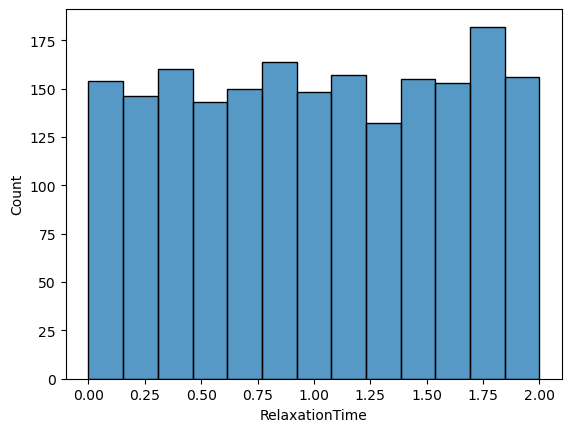

In [19]:
sns.histplot(x=sleeping_df['RelaxationTime'])

<Axes: xlabel='CaffeineIntake', ylabel='Count'>

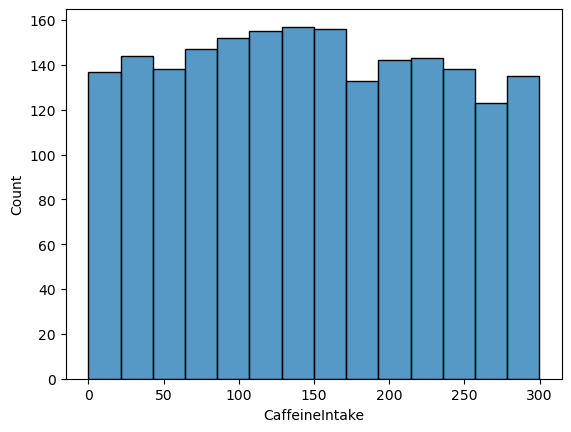

In [21]:
sns.histplot(x=sleeping_df['CaffeineIntake'])

<Axes: xlabel='WorkHours', ylabel='Count'>

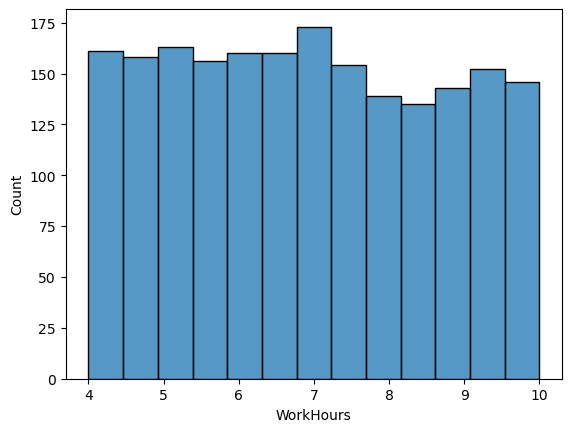

In [23]:
sns.histplot(x=sleeping_df['WorkHours'])

<Axes: xlabel='PhoneTime', ylabel='Count'>

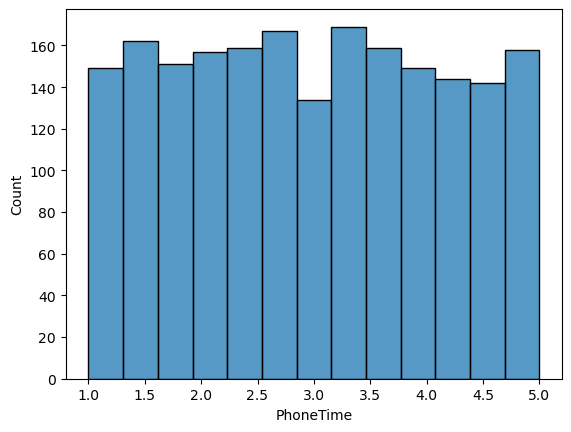

In [25]:
sns.histplot(x=sleeping_df['PhoneTime'])

<Axes: xlabel='ReadingTime', ylabel='Count'>

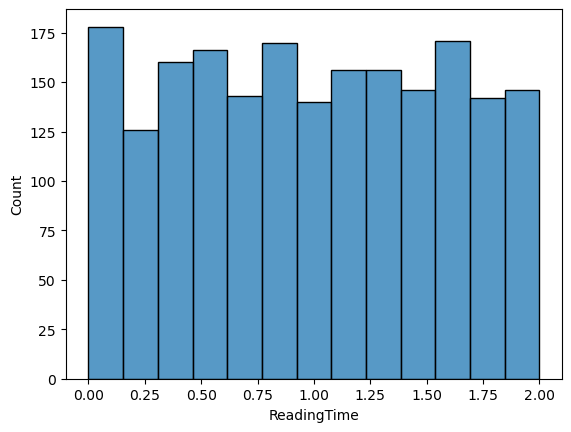

In [27]:
sns.histplot(x=sleeping_df['ReadingTime'])

<Axes: xlabel='WorkoutTime', ylabel='Count'>

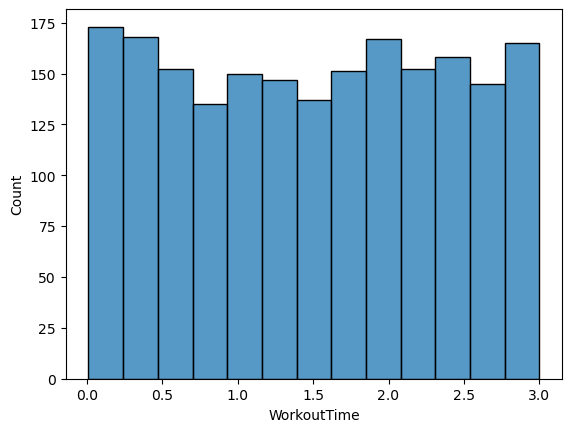

In [29]:
sns.histplot(x=sleeping_df['WorkoutTime'])

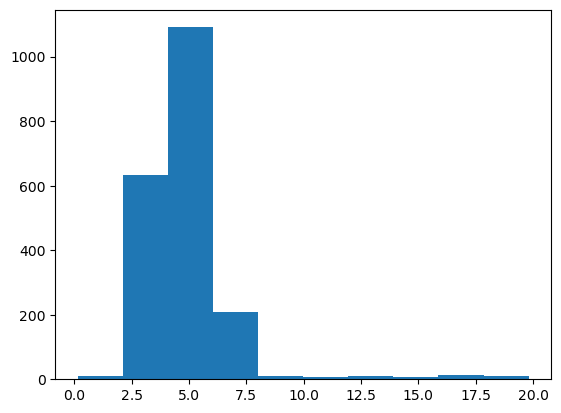

<Axes: xlabel='RelaxationTime', ylabel='SleepTime'>

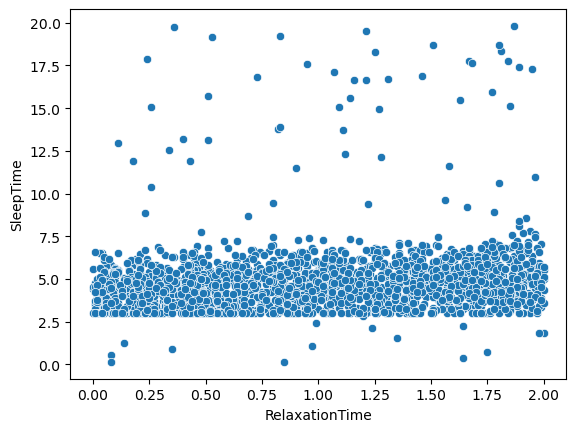

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(sleeping_df['SleepTime'], density=False)
plt.show()
##destity=True면 빈도수를 비율로 바꿔줌
##show()가 있으면 그래프만 나오고, show()가 없으면 그래프와 숫자(각 구간별 count)가 함께 프린트

#sns.distplot(sleeping_df['SleepTime'], kde=True, hist=False)
#plt.show()
##kde=True면 연속적인 줄(그래프)이 생김. hist는 막대 그래프(히스토그램)

sns.scatterplot(x='RelaxationTime', y='SleepTime', data=sleeping_df)

##seaborn이 오픈소스로 만들어진 것. 깃허브 정보 등을 공식 홈페이지에서 확인할 수 있다.
##라이브러리를 만든 사람이 쓴 참고 문서, 가이드 문서를 보고 싶다면 공식 홈페이지에서 확인, 예시도 있음
##어떤 인자가 있는지 어떤 값이 들어가는지 등 확인 가능. 읽고싶지 않게 생겼지만 친해지는게 좋음

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

X_train, X_test, y_train, y_test=train_test_split(data, label, test_size=0.25, random_state=21)

model=DecisionTreeRegressor()
model.fit(X_train, y_train)
print('스케일링 전(dtr): ', round(model.score(X_test, y_test),4))

model_=LinearRegression()
model_.fit(X_train, y_train)
print('스케일링 전(lr): ',round(model_.score(X_test, y_test), 4))

##스케일링을 한다고 해서 드라마틱한 변화는 없지만 카페인 인테이크만 시간 값이 아닌 다른 값이기 때문에
##스케일링은 필요

##상관관계가 있는 칼럼을 찾고 방법을 찾

##ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
##수치형 변수에서 실수개의 데이터를 다룰 때 decision tree를 쓰기 어렵다.

##slepptime<5 // sleeptime>=5

스케일링 전(dtr):  -0.9716
스케일링 전(lr):  0.2802


In [15]:
#MSE(Mean Squared Error): 평균 제곱 오차, 예측 값과 실제 값의 차이 확
#RMSE: 평균 제곱근 오차: 예측한 값과 실제 환경에서 관찰되는 값의 차이 다
##linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_target=sleeping_df['SleepTime']
X_data=sleeping_df.drop(['SleepTime'],axis=1, inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.25, random_state=21)

lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 3.081, RMSE: 1.755
Variance score: 0.280


<Axes: xlabel='SleepTime', ylabel='Count'>

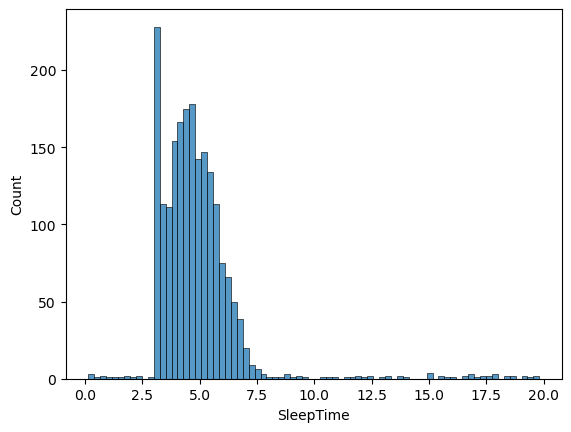

In [19]:
import seaborn as sns

sns.histplot(x=sleeping_df['SleepTime'])

<Axes: xlabel='SleepTime', ylabel='Count'>

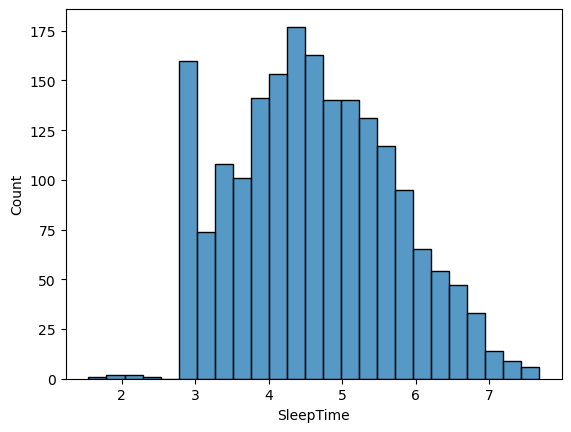

In [47]:
def detect_outliers(sleeping_df, columns):
    q1=sleeping_df[columns].quantile(0.25)
    q3=sleeping_df[columns].quantile(0.75)
    iqr=q3-q1
    y=sleeping_df[(sleeping_df[columns]>(q3+1.5*iqr)) | (sleeping_df[columns]<(q1-1.5*iqr))]
    #print(y)
    # search_df=sleeping_df[y]
    # return search_df, df.drop(search_df.index, axis=0)
    #sleeping_df=sleeping_df(y.index)
    return y

outliers=detect_outliers(sleeping_df,'SleepTime')
#outliers
sleeping_df=sleeping_df.drop(outliers.index, axis=0)
sleeping_df
#print("SleepTime IQR outliers: ",detect_outliers(sleeping_df,'SleepTime'))

sns.histplot(x=sleeping_df['SleepTime'])

<Axes: >

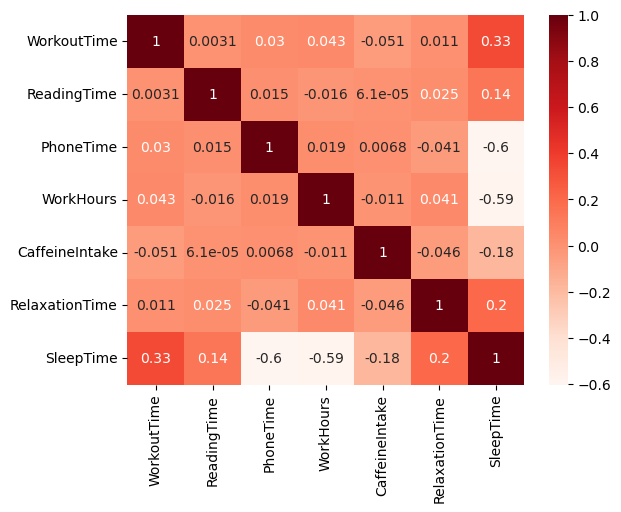

In [49]:
sns.heatmap(sleeping_df.corr(), annot=True, cmap='Reds')